In [349]:
import pandas as pd
from yellowbrick.cluster import KElbowVisualizer
from sklearn import cluster
from sklearn.metrics import silhouette_score

In [400]:
df_final = pd.read_csv("final_playlist.csv")

## KMEANS

In [363]:
columns_to_drop = ["id","names"]
X = df_final.drop(columns = columns_to_drop)

In [364]:
names_id = df_final[columns_to_drop]

In [392]:
names_id

,id,names
0,1VU8t2MpJRLG5iFEIxqq7z,Geboren um zu leben
1,4YRvb9B8cgvhst11qk8CKn,Sonnentanz
2,7qiZfU4dY1lWllzX7mPBI3,Shape of You
3,0E9ZjEAyAwOXZ7wJC0PD33,In My Mind
4,4OSBTYWVwsQhGLF9NHvIbR,Rolling in the Deep
...,...,...
4630,1Wl0fMRT0YzndDmHZCFvoT,Roadtrip
4631,6DGIg7YNSXWz1SAnJ1S8bX,Paradise
4632,6WzGciwEdqlkPuMf3bDmX7,Roadtrip
4633,2IJZWPp6TnMWHyGqjrz3Ci,Roadtrip - Moritz Hofbauer Remix


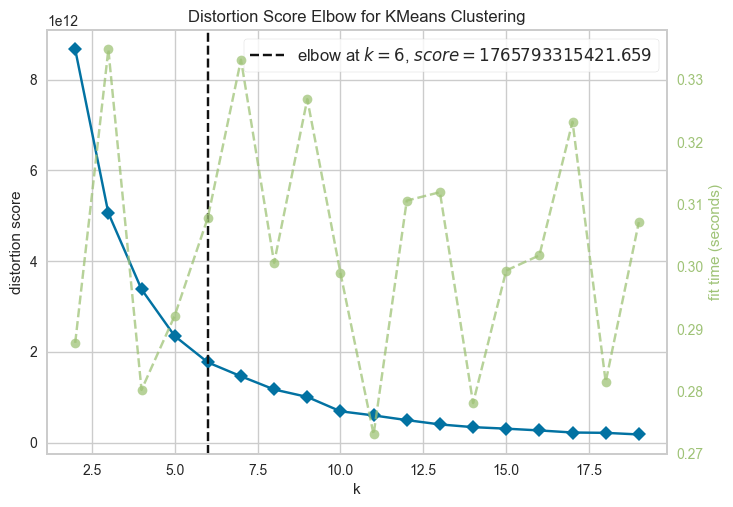

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [365]:
model = cluster.KMeans()
visualizer = KElbowVisualizer(model, k=(2,20))
visualizer.fit(X)
visualizer.poof()

In [366]:
kmeans = cluster.KMeans(n_clusters=6)
kmeans.fit(X)
pred = kmeans.predict(X)

In [367]:
silhouette_score(X, pred, metric='euclidean')

0.519434446924601

In [368]:
pred

array([0, 1, 0, ..., 2, 1, 0], dtype=int32)

In [369]:
X["Cluster"] = pred

In [370]:
df = pd.concat([X, names_id], axis = 1)

In [371]:
df.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,Cluster,id,names
0,0.513,0.868,-5.061,0.0410,0.0185,0.000000,0.1210,0.367,92.009,230467,0,1VU8t2MpJRLG5iFEIxqq7z,Geboren um zu leben
1,0.646,0.359,-10.388,0.1550,0.2470,0.914000,0.0872,0.154,119.885,360147,1,4YRvb9B8cgvhst11qk8CKn,Sonnentanz
2,0.825,0.652,-3.183,0.0802,0.5810,0.000000,0.0931,0.931,95.977,233713,0,7qiZfU4dY1lWllzX7mPBI3,Shape of You
3,0.694,0.770,-5.335,0.1490,0.1760,0.000011,0.1180,0.163,125.905,184560,2,0E9ZjEAyAwOXZ7wJC0PD33,In My Mind
4,0.730,0.769,-5.114,0.0298,0.1380,0.000000,0.0473,0.507,104.948,228093,0,4OSBTYWVwsQhGLF9NHvIbR,Rolling in the Deep


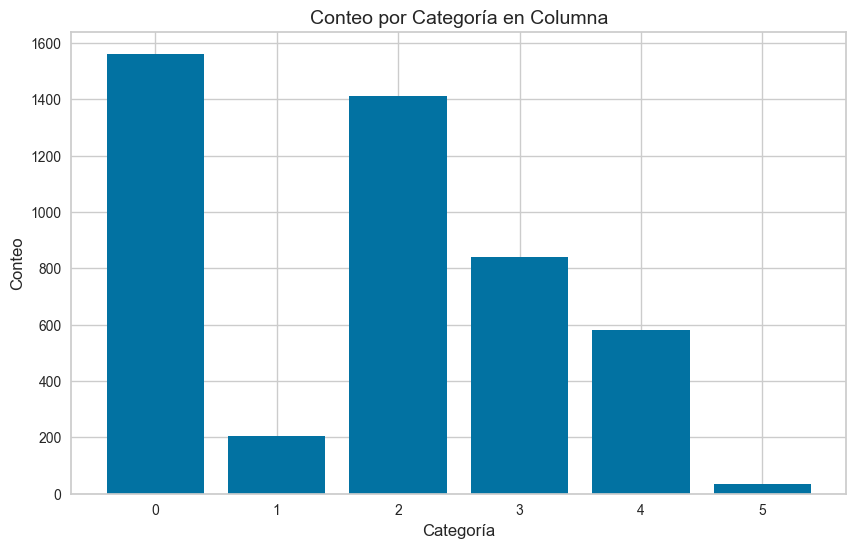

In [372]:
import matplotlib.pyplot as plt

counts = df['Cluster'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(counts.index, counts.values)


plt.title('Conteo por Categoría en Columna', fontsize=14)
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Conteo', fontsize=12)


plt.show()

## AglomerativeClustering

In [373]:
columns_to_drop = ["id","names"]
X = df_final.drop(columns = columns_to_drop)

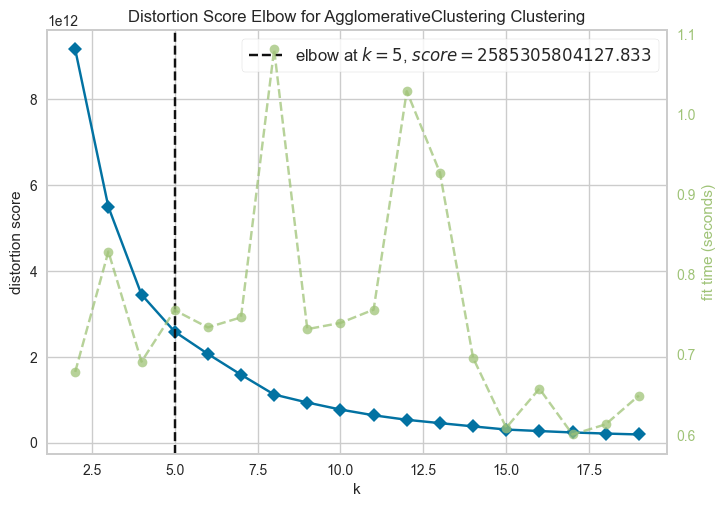

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [374]:
model = cluster.AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(2,20))
visualizer.fit(X)
visualizer.poof()

In [375]:
alg = cluster.AgglomerativeClustering(n_clusters=5, linkage="average")
pred = alg.fit_predict(X)

In [376]:
silhouette_score(X, pred, metric='euclidean')

0.5008150232903009

In [377]:
X["Cluster"] = pred

In [378]:
df = pd.concat([X, names_id], axis = 1)

In [379]:
df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,Cluster,id,names
0,0.513,0.868,-5.061,0.0410,0.01850,0.000000,0.1210,0.3670,92.009,230467,0,1VU8t2MpJRLG5iFEIxqq7z,Geboren um zu leben
1,0.646,0.359,-10.388,0.1550,0.24700,0.914000,0.0872,0.1540,119.885,360147,0,4YRvb9B8cgvhst11qk8CKn,Sonnentanz
2,0.825,0.652,-3.183,0.0802,0.58100,0.000000,0.0931,0.9310,95.977,233713,0,7qiZfU4dY1lWllzX7mPBI3,Shape of You
3,0.694,0.770,-5.335,0.1490,0.17600,0.000011,0.1180,0.1630,125.905,184560,0,0E9ZjEAyAwOXZ7wJC0PD33,In My Mind
4,0.730,0.769,-5.114,0.0298,0.13800,0.000000,0.0473,0.5070,104.948,228093,0,4OSBTYWVwsQhGLF9NHvIbR,Rolling in the Deep
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4630,0.719,0.580,-6.173,0.0903,0.08180,0.812000,0.1170,0.4900,170.099,131294,0,1Wl0fMRT0YzndDmHZCFvoT,Roadtrip
4631,0.449,0.585,-6.761,0.0268,0.05090,0.000087,0.0833,0.2120,139.631,278719,0,6DGIg7YNSXWz1SAnJ1S8bX,Paradise
4632,0.690,0.723,-9.204,0.0639,0.17400,0.000000,0.2550,0.4870,149.987,157192,0,6WzGciwEdqlkPuMf3bDmX7,Roadtrip
4633,0.626,0.674,-10.002,0.0411,0.00237,0.863000,0.1060,0.0489,124.977,375361,0,2IJZWPp6TnMWHyGqjrz3Ci,Roadtrip - Moritz Hofbauer Remix


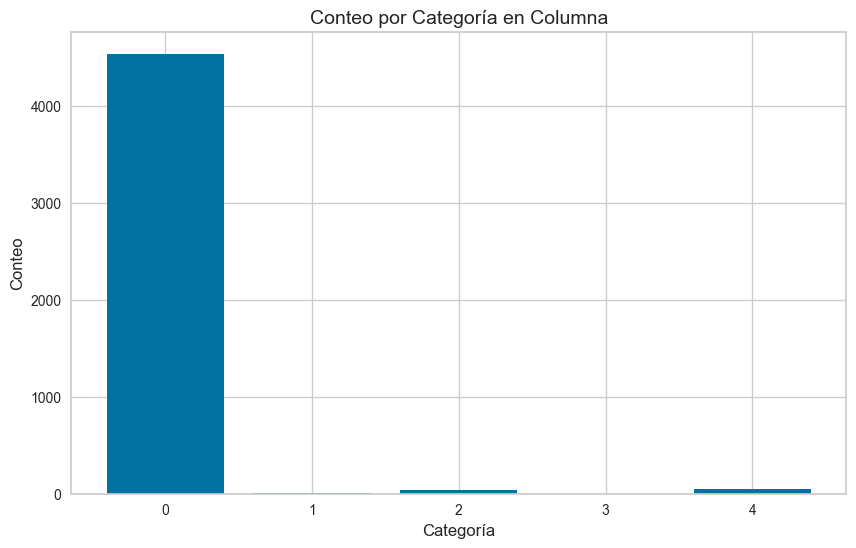

In [380]:
counts = df['Cluster'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(counts.index, counts.values)


plt.title('Conteo por Categoría en Columna', fontsize=14)
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Conteo', fontsize=12)


plt.show()

## BIRCH

In [381]:
columns_to_drop = ["id","names"]
X = df_final.drop(columns = columns_to_drop)

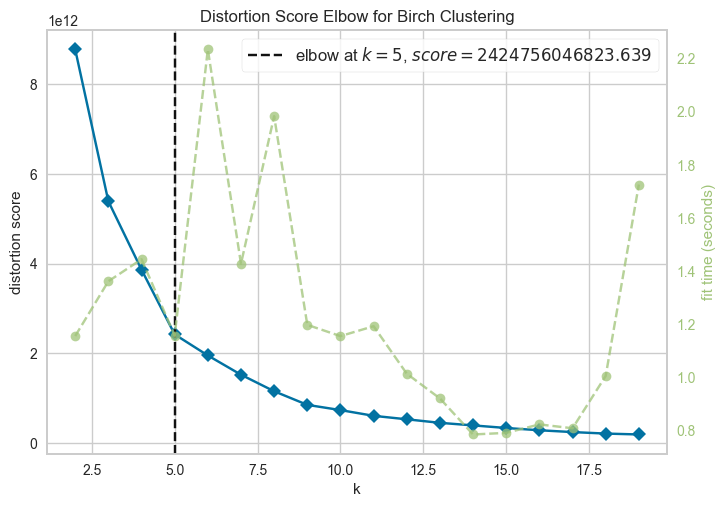

<Axes: title={'center': 'Distortion Score Elbow for Birch Clustering'}, xlabel='k', ylabel='distortion score'>

In [382]:
model = cluster.Birch()
visualizer = KElbowVisualizer(model, k=(2,20))
visualizer.fit(X)
visualizer.poof()

In [383]:
birch = cluster.Birch(n_clusters=5)
pred = birch.fit_predict(X)

In [384]:
silhouette_score(X, pred, metric='euclidean')

0.4963032644171642

In [385]:
X["Cluster"] = pred
df = pd.concat([X, names_id], axis = 1)

In [386]:
df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,Cluster,id,names
0,0.513,0.868,-5.061,0.0410,0.01850,0.000000,0.1210,0.3670,92.009,230467,2,1VU8t2MpJRLG5iFEIxqq7z,Geboren um zu leben
1,0.646,0.359,-10.388,0.1550,0.24700,0.914000,0.0872,0.1540,119.885,360147,4,4YRvb9B8cgvhst11qk8CKn,Sonnentanz
2,0.825,0.652,-3.183,0.0802,0.58100,0.000000,0.0931,0.9310,95.977,233713,2,7qiZfU4dY1lWllzX7mPBI3,Shape of You
3,0.694,0.770,-5.335,0.1490,0.17600,0.000011,0.1180,0.1630,125.905,184560,3,0E9ZjEAyAwOXZ7wJC0PD33,In My Mind
4,0.730,0.769,-5.114,0.0298,0.13800,0.000000,0.0473,0.5070,104.948,228093,2,4OSBTYWVwsQhGLF9NHvIbR,Rolling in the Deep
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4630,0.719,0.580,-6.173,0.0903,0.08180,0.812000,0.1170,0.4900,170.099,131294,0,1Wl0fMRT0YzndDmHZCFvoT,Roadtrip
4631,0.449,0.585,-6.761,0.0268,0.05090,0.000087,0.0833,0.2120,139.631,278719,4,6DGIg7YNSXWz1SAnJ1S8bX,Paradise
4632,0.690,0.723,-9.204,0.0639,0.17400,0.000000,0.2550,0.4870,149.987,157192,0,6WzGciwEdqlkPuMf3bDmX7,Roadtrip
4633,0.626,0.674,-10.002,0.0411,0.00237,0.863000,0.1060,0.0489,124.977,375361,4,2IJZWPp6TnMWHyGqjrz3Ci,Roadtrip - Moritz Hofbauer Remix


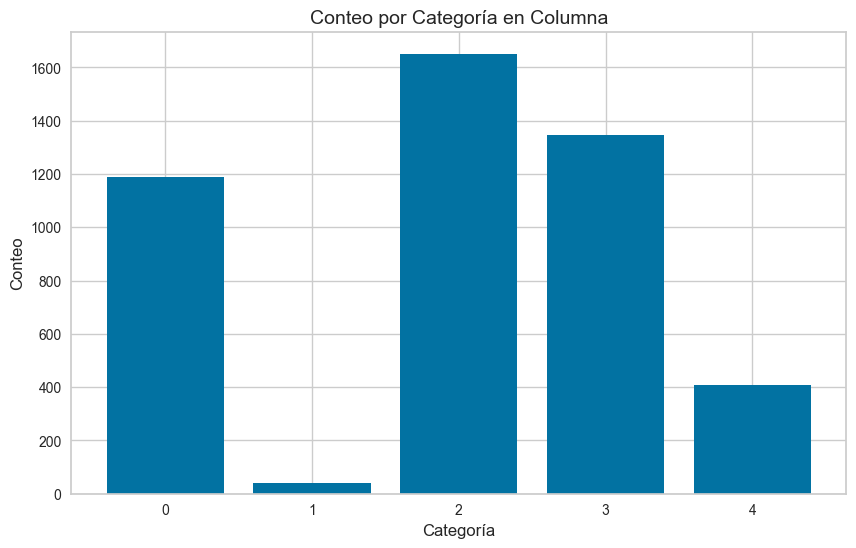

In [387]:
counts = df['Cluster'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(counts.index, counts.values)


plt.title('Conteo por Categoría en Columna', fontsize=14)
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Conteo', fontsize=12)


plt.show()

## FUNCTION

In [388]:
def create_final_dataframe (df, model, clusters):
    #Create X
    columns_to_drop = ["id","names"]
    X = df.drop(columns = columns_to_drop)

    #Run model
    model_pred = model(n_clusters=clusters)
    pred = model_pred.fit_predict(X)

    #Score 
    score = silhouette_score(X, pred, metric='euclidean')

    #Final dataframe 
    X["Cluster"] = pred
    df = pd.concat([X, names_id], axis = 1)

    return df, score



In [389]:
#MODELS: cluster.KMean ; cluster.Birch ; cluster.AgglomerativeClustering ; cluster.BisectingKMeans

In [397]:
df_1, score = create_final_dataframe(df_final, cluster.BisectingKMeans, 5)